In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Exploring the dataset


In [4]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [5]:
pd.set_option('display.max_columns',None)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
df_train.shape

(891, 12)

In [8]:
# checking null value
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
# checking duplicated value
df_train.duplicated().sum()

0

In [11]:
df_test.duplicated().sum()

0

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
#numerical and catergorical value
num_feature=df_train.select_dtypes(exclude=['object'])
cat_feature=df_train.select_dtypes(include=['object'])
print("Numerical feature ",num_feature.columns)
print("catergical feature ",cat_feature.columns)

Numerical feature  Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
catergical feature  Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

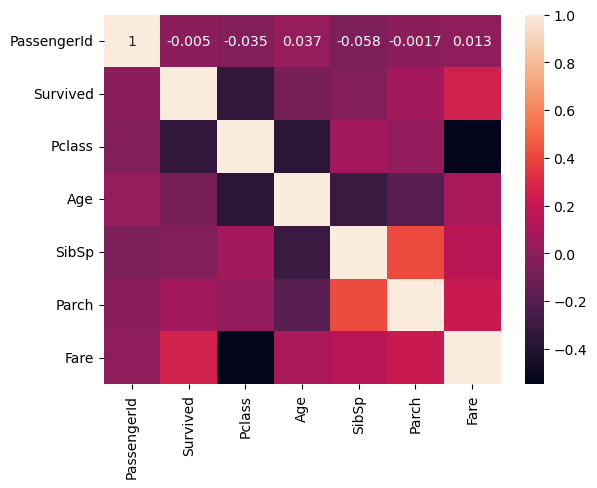

In [16]:
# seeing correlction of numerical feature in dataset
sns.heatmap(data=num_feature.corr(),annot=True)

In [17]:
## checking unique value in dataset 
def uniquevaluecount(df):
    for feature in df.columns:
        print("Unique value ",feature,df_train[feature].nunique())

In [18]:
uniquevaluecount(df_train)

Unique value  PassengerId 891
Unique value  Survived 2
Unique value  Pclass 3
Unique value  Name 891
Unique value  Sex 2
Unique value  Age 88
Unique value  SibSp 7
Unique value  Parch 7
Unique value  Ticket 681
Unique value  Fare 248
Unique value  Cabin 147
Unique value  Embarked 3


In [19]:
# what percentage of women and men Survived
survived_rate=df_train.groupby('Sex')['Survived'].mean()
survived_rates=pd.DataFrame(survived_rate)
survived_rates.head()

,Survived
Sex,
female,0.742038
male,0.188908


AttributeError: 'numpy.int64' object has no attribute 'startswith'

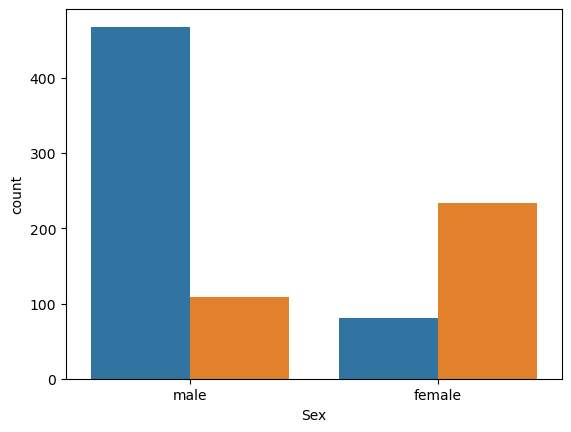

In [20]:
# visvulaizing the data on survival dataframe
sns.countplot(df_train,x='Sex',hue='Survived')

In [ ]:
sns.countplot(df_train,x='Embarked',hue='Survived')

In [ ]:
sns.countplot(df_train,x='Pclass',hue='Survived')

In [ ]:
# Plot a bar plot of average fare by survival status
survived_mean = df_train.groupby('Survived')['Fare'].mean()
survived_mean.plot(kind='bar', figsize=(8, 6))
plt.title('Average Fare by Survival Status')
plt.xlabel('Survival Status')
plt.ylabel('Average Fare')
plt.show()

In [ ]:
# handing missing value 
df_train.isnull().sum()


we observed miss value present in Age ,Embarked cabin  as cabin more that 90 percent value are missing we remove it for age we will use random samping to fill the value in embarked will use mode imputation method


In [ ]:
df_test.isnull().sum()

Handling  missing value


In [ ]:
df_train['Embarked']=df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])
df_train.drop(['Cabin','Name','PassengerId'],axis=1,inplace=True)
df_test.drop(['Cabin','Name','PassengerId'],axis=1,inplace=True)
df_test['Fare']=df_test['Fare'].fillna(df_test['Fare'].mean())

In [ ]:
def randomSamplings(df,column):
    #extracting non-missing value
    non_missing_value=df[column].dropna().values
    #creating mask for missing value
    missing_value=df[column].isna()
    #replace missing values with random sampling from non-missing value
    df.loc[missing_value,column]=np.random.choice(non_missing_value,size=missing_value.sum(),replace=True)
    

In [ ]:
randomSamplings(df_train,'Age')
randomSamplings(df_test,'Age')

In [ ]:
df_train.isnull().sum()

In [ ]:
#creating a independed and depended feature
target=df_train['Survived']
features=df_train.drop('Survived',axis=1)


as SVC cannot able to handle numerical value we need to convert into categorical using enocoding method

In [ ]:
from sklearn.preprocessing import LabelEncoder
def encoder(df,feature):
    encoding=LabelEncoder()
    df[feature]=encoding.fit_transform(df[feature])


In [ ]:
for x in features.columns:
    if features[x].dtype=='object':
        encoder(features,x)

In [ ]:
# splting dataset into train and test dataset 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(features,target,test_size=0.2,random_state=42)

Model Building 

In [ ]:
# we will use SVC 
from sklearn.svm import SVC
svc=SVC(C=10,gamma='scale',kernel='linear')
svc.fit(X_train,Y_train)

In [ ]:
# predcit the value
y_predict=svc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score
print("confusion _mtrix \n",confusion_matrix(Y_test,y_predict))
print("Accuracy score \n",accuracy_score(Y_test,y_predict))

In [ ]:
#Label enconding test data
for x in df_test.columns:
    if df_test[x].dtype=='object':
        encoder(df_test,x)

In [ ]:
y_sub_predict=svc.predict(df_test)

In [ ]:
test=pd.read_csv("test.csv")
submission=pd.DataFrame({
    'PassengerId':test['PassengerId'],
    'Survived':y_sub_predict
})

submission.to_csv('gender_submission.csv', index=False)
